In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook 

In [2]:
nx=41
L=2.0
dx=L/(nx-1)
nt=50
x=np.linspace(0.0, L, num=nx)
u0=np.ones(nx)
mask=np.where(np.logical_and(x>=0.5, x<=1.0))
u0[mask]=2.0
sigma_values=np.array([0.1, 0.25, 0.4, 0.5, 0.6])
nu=0.3
dt=sigma_values*dx*dx/nu
c=1.0

In [3]:
plt.style.use('dark_background')

In [4]:
def OneDconvection(nx, sigma_values, dt):
    for sigma in sigma_values:
        u1=np.ones((nt, nx))
        u1[0]=u0
        for n in range (1, nt):
            for i in range (nx-1):
                u1[n, i] = u1[n-1,i] + sigma * (u1[n-1,i+1] - 2*u1[n-1,i] + u1[n-1,i - 1])
        u1_values.append(u1) 
    return u1_values

In [5]:
u1_values=[]
u1_values=OneDconvection(nx, sigma_values, dt)


In [6]:
len(sigma_values)

5

In [7]:
tempu1_values=u0
ones=np.ones((5, nx))
for i in range(len(sigma_values)):
    for n in range(1, nt):
        tempu1_values=np.vstack((tempu1_values, u1_values[i][n,:]))
    tempu1_values=np.vstack((tempu1_values, ones))

<IPython.core.display.Javascript object>


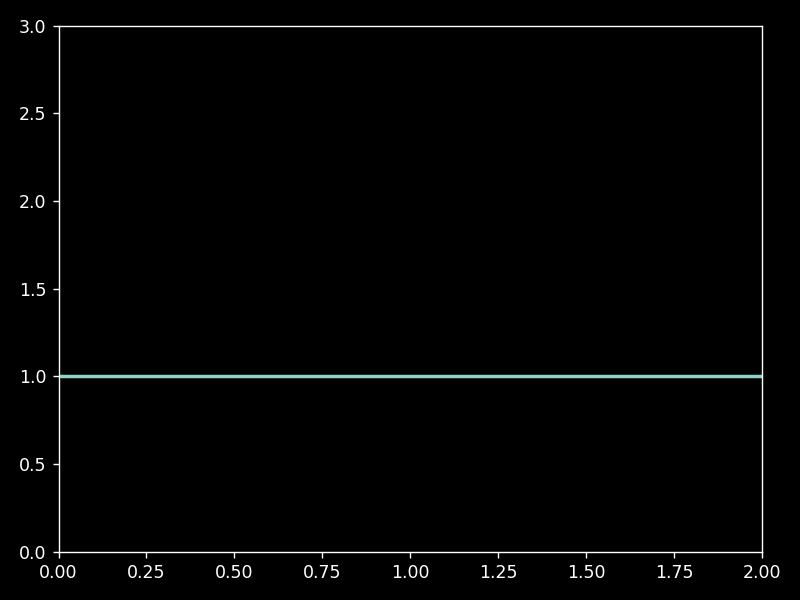

In [8]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(0, 3))
ln, = ax.plot([], [], lw = 2)
#line, = ax.plot([], [], linewidth=2)

def init():
    ln.set_data([], [])  
    return ln,
    #ax.set_xlim(0, 2)
    #ax.set_ylim(0, 2)
    #return ln,


def animate(i):
    #plt.cla()
    #plt.plot(x_values[0], u1_values[0][i,:], linewidth='6')
    xdata=x
    ydata=tempu1_values[i,:]
    #ydata=u1_values[0][i,:]
    ln.set_data(xdata, ydata)  
      
    return line,
    
anim=FuncAnimation(fig, animate, interval=100, init_func=init,  blit=True)
plt.tight_layout()
plt.show()
